In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import integrate
%matplotlib inline

Define the top hat shape function:

In [4]:
x, dx = np.linspace(-2, 2, 1000, retstep=True)
S = np.where(np.abs(x) < 0.5, 1, 0)

Higher order shape functions result from the (renormalized to 1) iterated convolution of the top hat shape function with itself: 

In [5]:
Sm = [S]
for i in range(1, 5):
    Si = np.convolve(Sm[-1], Sm[0], mode='same').astype(float)
    Si_value = integrate.trapz(Si, x)
    Si /= Si_value
    Sm.append(Si)

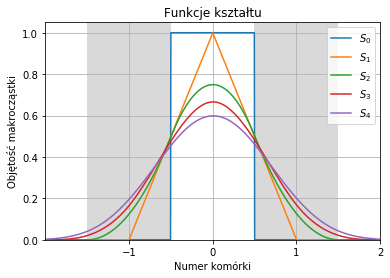

In [6]:
fig, ax = plt.subplots()
# ax.vlines([-1.5, -0.5, 0.5, 1.5], 0, 1, lw=4, alpha=0.3)
ax.plot(x, S, label="$S_0$")
height = 1.05
for xleft in [-1.5, +0.5]:
    rekt = patches.Rectangle((xleft, 0), 1, height, fill=True, facecolor='0.85')
    ax.add_patch(rekt)
for i in range(1, 5):
    ax.plot(x, Sm[i], label=f"$S_{i}$")
ax.set_title("Funkcje kształtu")
ax.set_xlabel("Numer komórki")
ax.set_xticks([-1, 0, 1, 2])
ax.set_ylabel("Objętość makrocząstki")
ax.set_xlim(-2, 2)
ax.set_ylim(0,height)
ax.grid()
ax.legend(loc='upper right')
fig.savefig("/home/dominik/Inzynierka/ThesisText/Images/shapefunctions.eps")

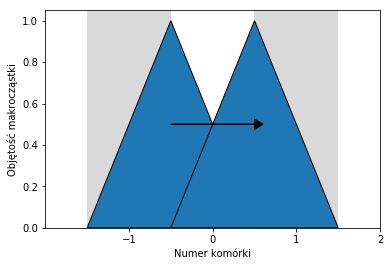

In [7]:
fig, ax = plt.subplots()
# ax.vlines([-1.5, -0.5, 0.5, 1.5], 0, 1, lw=4, alpha=0.3)
# ax.plot(x, S, label="$S_0$")
height = 1.05
for xleft in [-1.5, +0.5]:
    rekt = patches.Rectangle((xleft, 0), 1, height, fill=True, facecolor='0.85')
    ax.add_patch(rekt)

# for i in range(1, 5):
#     ax.plot(x, Sm[i], label=f"$S_{i}$")
# ax.set_title("")
ax.set_xlabel("Numer komórki")
ax.set_xticks([-1, 0, 1, 2])
ax.set_ylabel("Objętość makrocząstki")
ax.set_xlim(-2, 2)
ax.set_ylim(0,height)
# ax.grid()
right, left = -0.499, -1.499
for x_left in [left, right]:
    points = [[x_left, 0], [x_left + 2, 0], [x_left + 1, 1]]
    triangle = patches.Polygon(points, edgecolor='k')
    ax.add_patch(triangle)

ax.arrow(left + 1, 0.5, abs(right-left), 0, head_width=0.05, head_length = 0.1, fc='k')

# ax.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
# ax.legend(loc='upper right')
fig.savefig("/home/dominik/Inzynierka/ThesisText/Images/deposition-movement.eps")

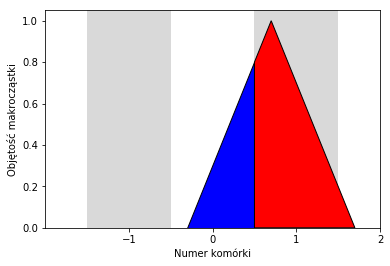

In [8]:
fig, ax = plt.subplots()
# ax.vlines([-1.5, -0.5, 0.5, 1.5], 0, 1, lw=4, alpha=0.3)
# ax.plot(x, S, label="$S_0$")
height = 1.05
for xleft in [-1.5, +0.5]:
    rekt = patches.Rectangle((xleft, 0), 1, height, fill=True, facecolor='0.85')
    ax.add_patch(rekt)

ax.set_xlabel("Numer komórki")
ax.set_xticks([-1, 0, 1, 2])
ax.set_ylabel("Objętość makrocząstki")
ax.set_xlim(-2, 2)
ax.set_ylim(0,height)
x_left = -0.4

def height(x, x1):
    return abs(x-x1)#/(x1 - 1))


x1 = -0.3
points_left = [[x1, 0], [0.5, 0], [0.5, height(0.5, x1)]]
points_right = [[0.5, height(0.5, x1)],  [x1+1, 1], [x1+2, 0], [0.5, 0],]
# points_right_2 = [[x1+1, 0], [x1+2, 0], [x1+1, 1]]
for points, color in zip([points_left, points_right], ['b', 'r']):
    triangle = patches.Polygon(points, edgecolor='k', fill=True, facecolor=color)
    ax.add_patch(triangle)

# ax.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
# ax.legend(loc='upper right')
fig.savefig("/home/dominik/Inzynierka/ThesisText/Images/charge-deposition.eps")

They're piecewise polynomials, so simply doing the following won't work:

In [7]:
for i, S in enumerate(Sm):
    fit = np.polyfit(x, S, i)
    print(fit)

[ 0.25]
[ 0.00037425  0.24975   ]
[-0.18985758  0.0007485   0.50340024]
[-0.00142981 -0.1752497   0.00456115  0.48388407]
[ 0.0701954  -0.00159704 -0.40215271  0.00532198  0.56150446]


In Fourier Space:

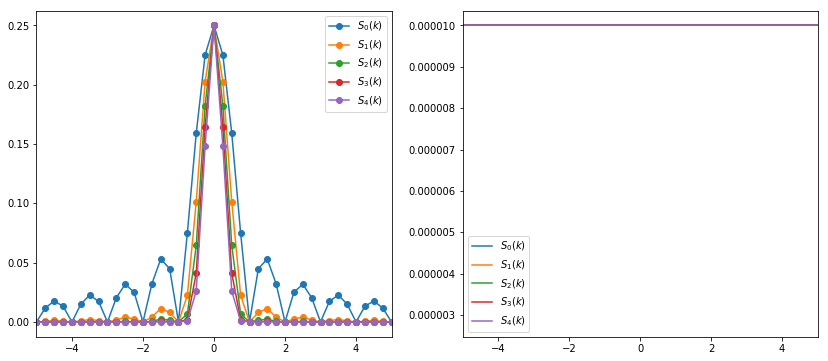

In [83]:
def Sk(k, m, dx):
    sinarg = 0.5 * k * dx
    return np.sinc(sinarg)**(2*(m+1))
freq = np.fft.fftshift(np.fft.fftfreq(len(x), dx))
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
for i, S in enumerate(Sm):
    Sfft = np.fft.fftshift(np.abs(np.fft.fft(S)/len(x)))
    ax1.plot(freq, Sfft, "o-", label=f"$S_{i}(k)$")
    ax1.set_xlim(-5, 5)
    ax2.plot(freq, Sk(freq, i+1, dx)/len(x), label=f"$S_{i}(k)$")
    ax2.set_xlim(-5, 5)
ax1.legend()
ax2.legend()

Now I'm not quite getting the transform which is supposed to be

$$S_m(k) = \text{sinc}^{m+1} (k \Delta x / 2) $$

I do see increased spectral leakage for the low order shape functions though.